In [6]:
!pip install tensorflow


In [7]:
# Step 1: Import Required Libraries
# ----------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


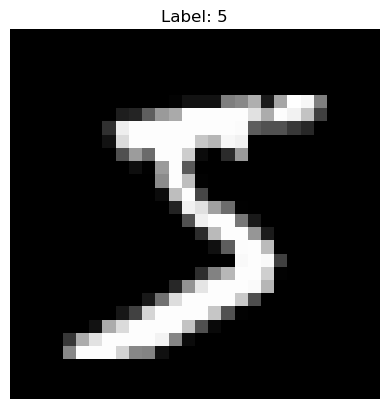

In [8]:
# Step 2: Load MNIST Dataset
# ----------------------------
# MNIST: 70,000 grayscale images (28x28 pixels) of handwritten digits (0–9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Visualize one sample
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [9]:
# Step 3: Preprocess Data
# ----------------------------
# Flatten each 28x28 image into a 784-dimensional vector
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

# Normalize pixel values to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-hot encode the labels (0–9 → 10 output neurons)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Flattened train shape:", X_train.shape)
print("One-hot label shape:", y_train.shape)


Flattened train shape: (60000, 784)
One-hot label shape: (60000, 10)


In [10]:
# Step 4: Define Feedforward Neural Network Architecture
# ----------------------------
model = Sequential([
    Dense(256, input_shape=(784,), activation='sigmoid'),  # Hidden Layer 1
    Dense(128, activation='sigmoid'),                      # Hidden Layer 2
    Dense(10, activation='softmax')                        # Output Layer (10 classes)
])

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Step 5: Compile the Model
# ----------------------------
# Using Stochastic Gradient Descent (SGD) optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',   # Suitable for classification
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Step 6: Train the Model
# ----------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,            # Number of times data passes through the network
    batch_size=128,       # Number of samples per gradient update
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.2002 - loss: 2.2709 - val_accuracy: 0.2874 - val_loss: 2.2317
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4194 - loss: 2.1955 - val_accuracy: 0.5005 - val_loss: 2.1514
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5475 - loss: 2.1019 - val_accuracy: 0.6143 - val_loss: 2.0372
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6119 - loss: 1.9673 - val_accuracy: 0.6041 - val_loss: 1.8763
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6503 - loss: 1.7836 - val_accuracy: 0.6773 - val_loss: 1.6664
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6870 - loss: 1.5674 - val_accuracy: 0.7193 - val_loss: 1.4434
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7189 - loss: 1.3553 - val_accuracy: 0.7397 - val_loss: 1.2431
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7441 - loss: 1.1750 - val_acc

In [13]:
# Step 7: Evaluate the Model
# ----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 79.85%
Test Loss: 0.8605


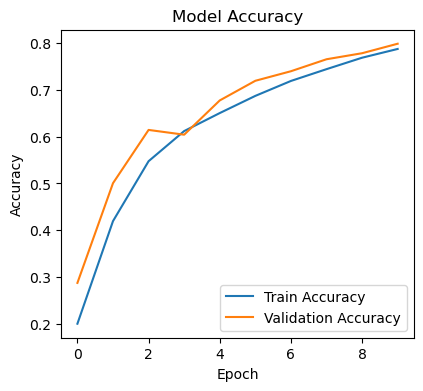

In [14]:
# Step 8: Plot Training Loss & Accuracy
# ----------------------------
plt.figure(figsize=(10,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

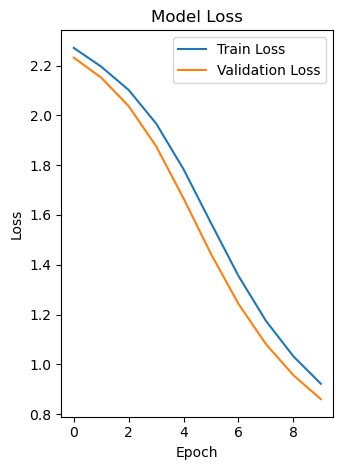

In [15]:
# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Step 9: Classification Report
# ----------------------------
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.8546    0.9653    0.9066       980
           1     0.8141    0.9841    0.8911      1135
           2     0.8454    0.7578    0.7992      1032
           3     0.7270    0.8356    0.7775      1010
           4     0.7083    0.8086    0.7551       982
           5     0.7921    0.5639    0.6588       892
           6     0.8419    0.9061    0.8728       958
           7     0.8099    0.8911    0.8485      1028
           8     0.8619    0.6088    0.7136       974
           9     0.7503    0.6165    0.6768      1009

    accuracy                         0.7985     10000
   macro avg     0.8006    0.7938    0.7900     10000
weighted avg     0.8006    0.7985    0.7925     10000

